# Machine Learning - Assignment 2: Logistic Regression
## by Anton Wiehe & Angelie Kraft

In [11]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time
import random


def load_data():
    features = []
    labels = []
    with open("data.txt", 'r') as file:
        for line in file:
            words = line.split()
            features.append([float(item) for item in words[0:2]])
            labels.append(int(words[2]))
    return np.array(features), np.array(labels)


In [12]:
def linear_model(features, thetas):
    return thetas[0] + thetas[1] * features[:, 0] + thetas[2] * features[:, 1]

def linear_model_deriv(features, thetas):
    return np.array([np.ones_like(features[:, 0]), features[:, 0], features[:, 1]])

def sigmoid(activation):
    return 1 / (1 + np.e ** (-activation))

def sigmoid_deriv(activation):
    return sigmoid(activation) * (1 - sigmoid(activation))

def decision_line(x, thetas):
    return (thetas[0] + thetas[1] * x) * (-1 / thetas[2])

In [13]:
# Generate thetas
def generate_thetas(number_of_thetas):
    return np.random.uniform(-0.01, 0.01, number_of_thetas)

In [14]:
# Shuffle two lists in same order
def shuffle(a,b):
    assert len(a) == len(b)
    idxs = np.arange(0, len(a), 1)
    np.random.shuffle(idxs)
    return a[idxs], b[idxs]

In [15]:
# Calc derivative of mean squared error
def mse_deriv(x, y):
    return np.mean(-2 * (x - y), axis=0)

# Calc mean squared error = loss function
def mse(x, y):
    return np.mean((x - y) ** 2)

## Stochastic Gradient Descent

In [16]:
def sgd_log_regression(inputs, targets, thetas, epochs=100, lr=0.1, batch_size=1):
    print("learning rate:", lr)
    
    # Saved thetas to later plot initial, untrained model
    init_thetas = thetas
    
    # initialize plot
    fig = plt.figure(1)
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    plt.ion()
    fig.tight_layout()
    fig.show()
    fig.canvas.draw()
    
    errors = []
    
    initial_points = inputs.copy()
    ideal_x = np.arange(-3, 3, 0.01) 
    label_0 = inputs[labels == 0].copy()
    label_1 = inputs[labels == 1].copy()
    
    for epoch in range(epochs):
        shuffle(targets, inputs)
        error = 0
        for batch_idx in range(len(inputs) // batch_size):
            batch_inputs = inputs[batch_idx * batch_size:batch_idx * batch_size + batch_size]
            batch_targets = targets[batch_idx * batch_size:batch_idx * batch_size + batch_size]
            batch_linear_model = linear_model(batch_inputs, thetas)
            batch_predictions = sigmoid(batch_linear_model)
            error = mse(batch_targets, batch_predictions)
            errors.append(error)
            gradient = mse_deriv(batch_targets, batch_predictions) * linear_model_deriv(batch_inputs, thetas) * sigmoid_deriv(batch_linear_model)
            mean_gradient = np.mean(gradient, axis=1)
            thetas = thetas - lr * mean_gradient 
        
        # update plot
        ax1.clear()
        ax1.scatter(label_0[:,0], label_0[:,1], color="red", label="0") 
        ax1.scatter(label_1[:,0], label_1[:,1], color="blue", label="1") 
        ax1.plot(ideal_x, decision_line(ideal_x, init_thetas), color='blue', label="Initial decision line")
        ax1.plot(ideal_x, decision_line(ideal_x, thetas), color='black', label="Trained decision line")
        ax1.set_label("Epoch: " + str(epoch))
        ax1.legend(loc=3)
        ax1.set(xlabel="X",ylabel="Y")
        
        fig.canvas.draw()
        
        ax2.clear()
        errors_smoothed = running_average_cumsum(errors, window=1000)
        ax2.plot(errors_smoothed)
        ax2.set_label("MSE training during training")
        ax2.set(xlabel="Training Steps",ylabel="MSE")
        fig.canvas.draw()
        time.sleep(0.001)

    print("Final thetas: ", thetas)
    #fig.canvas.draw()
    return thetas, errors

In [17]:
# smoothing
def running_average_cumsum(seq, window=100):
    s = np.insert(np.cumsum(seq), 0, [0])
    return (s[window :] - s[:-window]) * (1. / window)

learning rate: 0.1


<IPython.core.display.Javascript object>


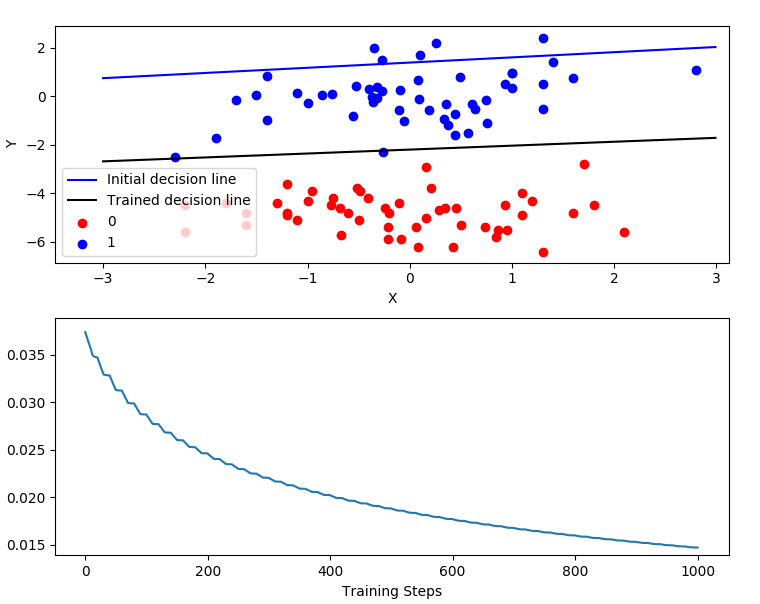

Final thetas:  [ 3.0830543  -0.22710735  1.40381213]


In [18]:
features, labels = load_data()

thetas = generate_thetas(3)

epochs = 100
trained_thetas, errors = sgd_log_regression(features, labels, thetas, epochs=epochs, lr=0.1, batch_size=5)

# Batch size = 1 for Stochastic Gradient Descent

In [20]:
print("Final error: " , errors[-1], "\nLearning rate: 0.1")
print('Resulting function: \nf(x) = {0} + {1} * x_1 + {2} * x_2'.format(trained_thetas[0], trained_thetas[1], trained_thetas[2]))


Final error:  0.013264012302862139 
Learning rate: 0.1
Resulting function: 
f(x) = 3.083054300813526 + -0.22710734694237342 * x_1 + 1.403812132481658 * x_2
